# Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
from classifiers.bayesian_classifier import BayesianGaussianClassifier
from utils.synthetic_data_generator import SyntheticDatasetGenerator
from utils.classifier_utils import ClassifierUtils
from utils.dataset_utils import DatasetUtils
from utils.image_generator import ImageGenerator

# Definição de constantes

In [2]:
np.random.seed(42)
CLASSIFIER_NAME = "Bayesian Gaussian"
TARGET_COLUMN_NAME = "y"
DATASET_NAME = "Synthetic"
TEST_SIZE = 0.3
HOLDOUT_INDEXES_NUMBER = 200
FIG_SIZE = (12, 10)
IMAGE_FONT_SIZE = 20
RESOLUTION_POINTS = 1000

# Construindo dataset sintético

In [3]:
features_patterns = {
    "pattern_1": {"pattern": np.array([[2, 2]]), "num_samples": 40, "y": 0},
    "pattern_2": {"pattern": np.array([[1, 3]]), "num_samples": 40, "y": 1},
    "pattern_3": {"pattern": np.array([[3, 3]]), "num_samples": 40, "y": 2},
}

generator = SyntheticDatasetGenerator()
synthetic_df = generator.generate_data(features_patterns)

In [4]:
synthetic_df

,x0,x1,y
0,1.981662,2.124855,0
1,2.023588,1.932348,0
2,2.253776,2.120979,0
3,2.278272,2.243546,0
4,2.226492,2.245594,0
...,...,...,...
115,2.821847,3.194206,2
116,3.155509,3.090422,2
117,2.892193,3.082778,2
118,3.056115,3.166760,2


In [5]:
list(synthetic_df[TARGET_COLUMN_NAME].unique())

[np.int64(0), np.int64(1), np.int64(2)]

# Treinamento e avaliação dos modelos, juntamente com a criação de tabela de métricas para o classificador Bayesiano

In [6]:
bayesian_holdout_indexes = ClassifierUtils.create_multiple_holdout_indexes(
    df=synthetic_df, n_indexes=HOLDOUT_INDEXES_NUMBER, test_size=TEST_SIZE
)

bayesian_accuracy_list = []

for train_indexes, test_indexes in bayesian_holdout_indexes:
    X_train, y_train, X_test, y_test = ClassifierUtils.separate_train_test(
        df=synthetic_df,
        train_indexes=train_indexes,
        test_indexes=test_indexes,
        target_column_name=TARGET_COLUMN_NAME,
    )

    classifier = BayesianGaussianClassifier()
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test=X_test)

    accuracy = ClassifierUtils.calculate_accuracy(y_true=y_test, y_pred=y_pred)
    error_rate = ClassifierUtils.calculate_error_rate(y_true=y_test, y_pred=y_pred)

    confusion_matrix_result = ClassifierUtils.confusion_matrix(
        y_true=y_test, y_pred=y_pred
    )

    bayesian_accuracy_list.append(
        (
            accuracy,
            error_rate,
            train_indexes,
            test_indexes,
            y_pred,
            confusion_matrix_result,
        )
    )

bayesian_df_results = pd.DataFrame(
    bayesian_accuracy_list,
    columns=[
        "accuracy",
        "error_rate",
        "train_indexes",
        "test_indexes",
        "y_pred",
        "confusion_matrix",
    ],
)

bayesian_df_results

,accuracy,error_rate,train_indexes,test_indexes,y_pred,confusion_matrix
0,1.0,0.0,"[115, 38, 19, 13, 106, 45, 20, 33, 4, 9, 99, 6...","[0, 3, 8, 10, 11, 23, 26, 28, 31, 40, 44, 49, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...","[[9, 0, 0], [0, 13, 0], [0, 0, 14]]"
1,1.0,0.0,"[34, 66, 28, 102, 52, 35, 115, 113, 15, 119, 4...","[1, 2, 10, 11, 13, 16, 17, 19, 31, 36, 37, 40,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[[11, 0, 0], [0, 10, 0], [0, 0, 15]]"
2,1.0,0.0,"[94, 83, 86, 63, 97, 32, 47, 34, 58, 29, 69, 6...","[0, 2, 9, 10, 12, 13, 20, 24, 30, 36, 38, 39, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[[12, 0, 0], [0, 11, 0], [0, 0, 13]]"
3,1.0,0.0,"[33, 83, 56, 21, 64, 42, 16, 45, 71, 13, 22, 3...","[3, 4, 6, 10, 12, 14, 20, 24, 27, 30, 32, 36, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[[12, 0, 0], [0, 10, 0], [0, 0, 14]]"
4,1.0,0.0,"[37, 6, 13, 31, 30, 45, 83, 115, 38, 62, 57, 1...","[1, 2, 7, 9, 10, 12, 17, 20, 21, 23, 24, 25, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[[14, 0, 0], [0, 10, 0], [0, 0, 12]]"
...,...,...,...,...,...,...
195,1.0,0.0,"[53, 48, 85, 102, 91, 60, 117, 71, 63, 51, 110...","[0, 3, 8, 10, 11, 12, 18, 19, 20, 22, 23, 26, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[[13, 0, 0], [0, 9, 0], [0, 0, 14]]"
196,1.0,0.0,"[24, 88, 36, 32, 19, 46, 115, 117, 37, 75, 17,...","[3, 5, 6, 11, 13, 14, 15, 16, 20, 22, 23, 31, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[[13, 0, 0], [0, 16, 0], [0, 0, 7]]"
197,1.0,0.0,"[42, 84, 49, 109, 72, 14, 113, 13, 17, 105, 89...","[1, 2, 4, 8, 10, 11, 21, 28, 31, 32, 34, 39, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[[12, 0, 0], [0, 13, 0], [0, 0, 11]]"
198,1.0,0.0,"[112, 86, 83, 46, 28, 73, 78, 113, 65, 100, 42...","[0, 4, 10, 11, 15, 16, 21, 24, 26, 30, 31, 36,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[[13, 0, 0], [0, 8, 0], [0, 0, 15]]"


# Vetor de acurácias

In [7]:
bayesian_accuracy_vector = pd.Series(bayesian_df_results["accuracy"])

In [8]:
bayesian_accuracy_vector

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
195    1.0
196    1.0
197    1.0
198    1.0
199    1.0
Name: accuracy, Length: 200, dtype: float64

# Definindo gerador de imagens

In [9]:
image_generator = ImageGenerator(figure_size=FIG_SIZE, font_size=IMAGE_FONT_SIZE)

# Boxplot das acurácias do classificador Bayesiano

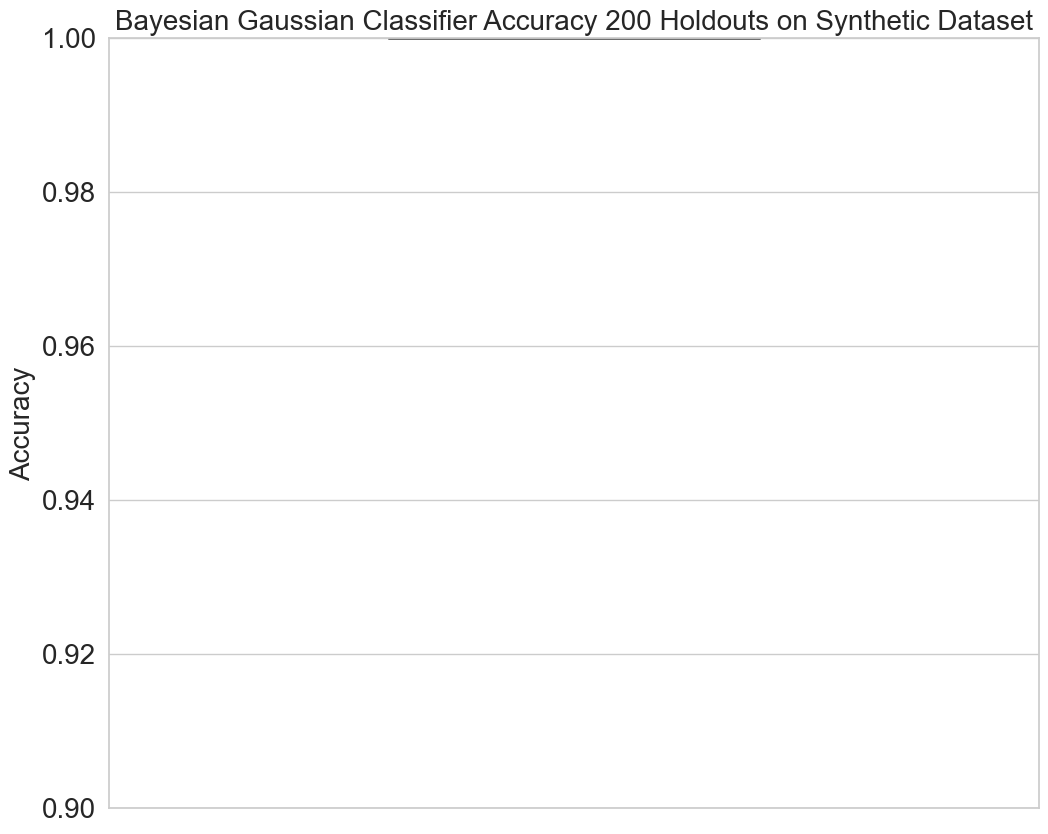

In [10]:
image_generator.create_boxplot(
    vector_distribution=bayesian_accuracy_vector,
    y_label="Accuracy",
    image_title=f"{CLASSIFIER_NAME} Classifier Accuracy {HOLDOUT_INDEXES_NUMBER} Holdouts on {DATASET_NAME} Dataset",
    path_to_save="../../data/images/atividade_2/synthetic_bayesian_accuracy_boxplot.jpeg",
    show=True,
)

# Baseado na melhor acurácia, pego os índices de treino e teste que geraram ela e calculo a superfície de decisão e também resgato a sua respectiva matriz de confusão

In [11]:
max_accuracy = bayesian_df_results["accuracy"].max()
indexes_of_max_accuracy = bayesian_df_results[
    bayesian_df_results["accuracy"] == max_accuracy
].index.tolist()

index_selected = np.random.choice(indexes_of_max_accuracy)

print(f"Índice(s) com melhor acurácia: {indexes_of_max_accuracy}")
print(f"Índice selecionado aleatoriamente: {index_selected}")
print(f"Acurácia do índice selecionado: {max_accuracy * 100:.2f}%")

best_accuracy_train_indexes = bayesian_df_results.loc[index_selected, "train_indexes"]
best_accuracy_test_indexes = bayesian_df_results.loc[index_selected, "test_indexes"]

X_train, y_train, X_test, y_test = ClassifierUtils.separate_train_test(
    df=synthetic_df,
    train_indexes=best_accuracy_train_indexes,
    test_indexes=best_accuracy_test_indexes,
    target_column_name=TARGET_COLUMN_NAME,
)

Índice(s) com melhor acurácia: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
Índice selecionado aleatoriamente: 36
Acurácia do índice selecionado: 100.00%


# Resgatando a matriz de confusão e plotando ela

In [12]:
confusion_matrix_result = bayesian_df_results.loc[index_selected, "confusion_matrix"]

In [13]:
confusion_matrix_result

array([[15,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 12]])

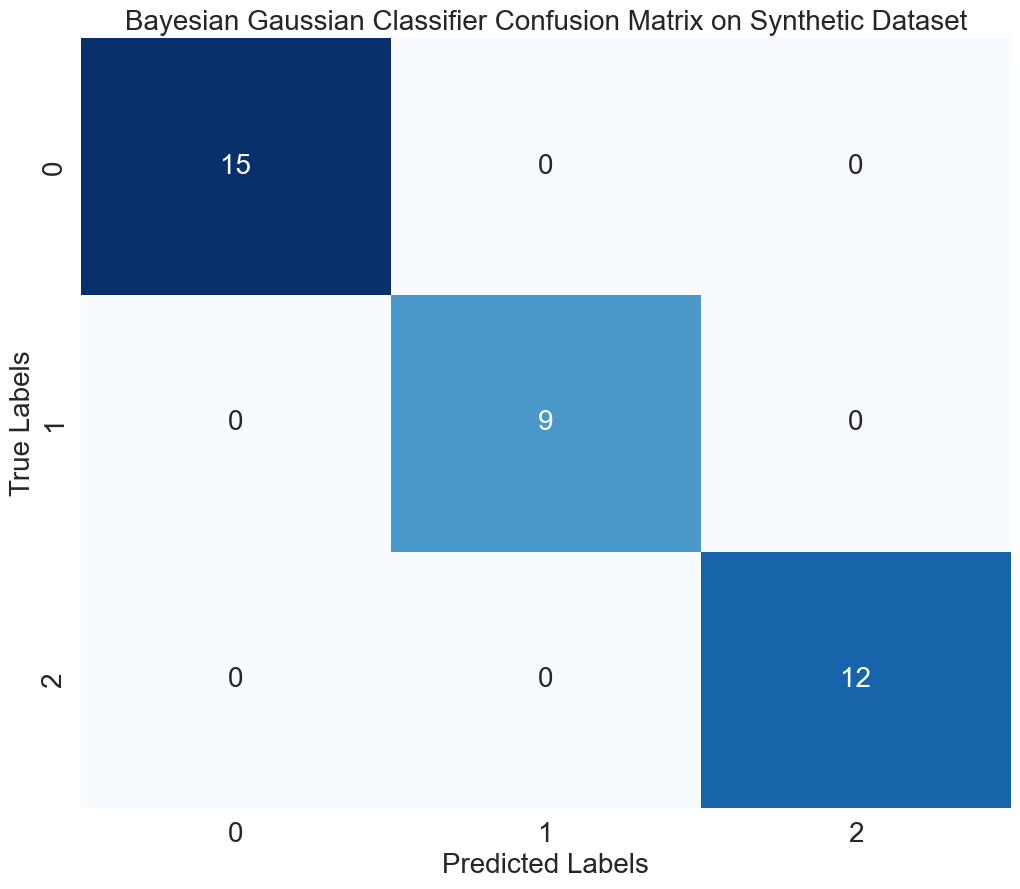

In [14]:
image_generator.create_confusion_matrix_heatmap(
    confusion_matrix=confusion_matrix_result,
    x_label="Predicted Labels",
    y_label="True Labels",
    image_title=f"{CLASSIFIER_NAME} Classifier Confusion Matrix on {DATASET_NAME} Dataset",
    path_to_save="../../data/images/atividade_2/synthetic_bayesian_confusion_matrix.jpeg",
    show=True,
)

# Calculo de superfície de decisão para o classificador Bayesiano baseado em duas features

In [15]:
feature_x = X_train.columns[0]
feature_y = X_train.columns[1]

test_grid, x_shape, y_shape = DatasetUtils.create_test_grid(
    X_train=X_train,
    feature_x=feature_x,
    feature_y=feature_y,
    resolution_points=RESOLUTION_POINTS,
    return_shapes=True,
)

classifier = BayesianGaussianClassifier()
classifier.fit(X_train[[feature_x, feature_y]], y_train)

y_pred_test_grid = classifier.predict(test_grid)

y_pred_test_grid = y_pred_test_grid.reshape(x_shape)

# Plot da superfície de decisão para o classificador Bayesiano

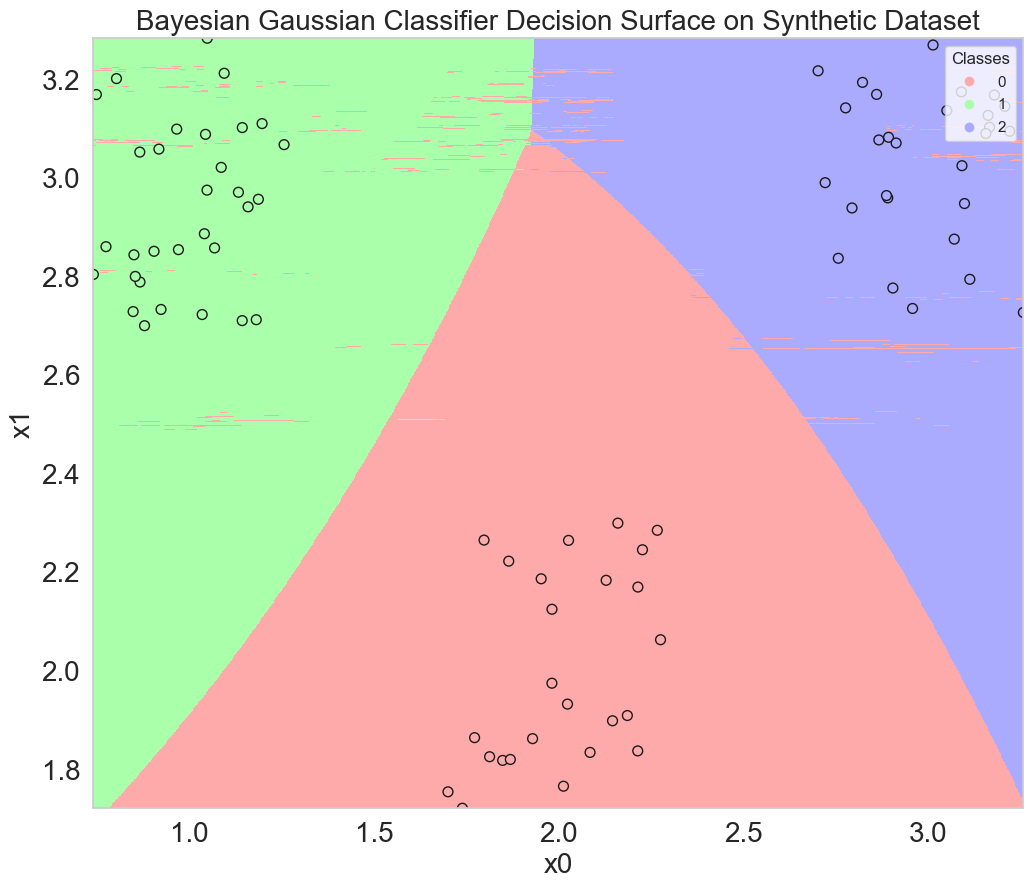

In [16]:
image_generator.create_decision_surface(
    X_train=X_train,
    y_train=y_train,
    y_pred=y_pred_test_grid,
    image_title=f"{CLASSIFIER_NAME} Classifier Decision Surface on {DATASET_NAME} Dataset",
    feature_x=feature_x,
    feature_y=feature_y,
    resolution_points=RESOLUTION_POINTS,
    path_to_save="../../data/images/atividade_2/synthetic_bayesian_decision_surface.jpeg",
    show=True,
)